<a href="https://colab.research.google.com/github/kobestenson/COMPPHYS/blob/main/Kobe_Stenson_Lab05_Part2_SHM_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5, Part 2: Modeling Simple Harmonic Motion with the Euler Method
*Written by Rose Finn*

*Adapted from Giordano & Nakanishi, Chapter 3*

In [ ]:
# import numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt

## Write a Function to calculate acceleration

(5 points)

Write a function called **acceleration** that does the following:
* Input
  * spring constant, $k$
  * mass, $m$
  * displacement from equilibrium, $dx$

* The function should calculate the acceleration using Hooke's law.  Make sure you correctly account for the direction of the force!

* The function should return acceleration

In [ ]:
# acceleration function here
# write the multi-line comment at the beginning
def acceleration(k,m,dx):
  """
  description: calculate acceleration using Hooke's Law

  parameters: k,m,dx

  return: acceleration


  """
  # your code here
  a = -k/m*dx
  return a


## Write function to create and initialize position and velocity arrays

(5 points)

Write a function called **initialize** that does the following.
* Input
  * initial position, $x_0$
  * initial velocity, $v_0$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the time, position and velocity arrays using `np.zeros`
  * set the first value of the position array to $x_0$
  * set the first value of the velocity array to $v_0$

* The function should return
  * time array
  * position array
  * velocity array

In [ ]:
# write your initialize function
# be sure to include your multi-line comment string

def initialize(x0,v0,tmax,dt):
  """
  description: initialize time, position, and velocity into empty arrays

  parameters: x0,v0,tmax,dt

  return: t, pos, vel


  """
  nsteps = int(tmax/dt)
  t = np.zeros(nsteps)
  pos = np.zeros(nsteps)
  vel = np.zeros(nsteps)

  pos[0] = x0
  vel[0] = v0

  return t, pos, vel

## Write function to calculate Euler

(5 points)

Write a function called **calculate** that does the following.
* Input
  * time array
  * position array
  * velocity array
  * spring constant, $k$
  * mass, $m$
  * time step, dt

* Optional input argument
  * equilibrium position, $xeq$.  
  * Set the default value to zero.

* The function should calculate the position and velocity as a function of time using the Euler method.

* Return
  * time array
  * position array
  * velocity array

In [ ]:
# write your calculate function here
def calculate(t,pos,vel,k,m,dt):
  """
  description: calculate the position and velocity using the Euler method for time

  parameters: t,pos,vel,k,m,dt,xeq=0

  return: t, pos, vel
  """

  # your code here
  omega = np.sqrt(k/m)
  phi = 0.35

  for i in range(1,len(t)):
    pos[i] = pos[i-1] + vel[i-1]*dt
    vel[i] = vel[i-1] + acceleration(k,m,pos[i-1]*dt)
    t[i] = t[i-1] + dt

  return t, pos, vel

## Write your main program

(5 points)

Follow the instructions in the cell below to model the motion of a mass on a spring.


In [ ]:
#### Analytical solution from part 1
def calculate_2(A, omega, phi, time):
  position = A*np.cos(omega*time-phi)
  return position

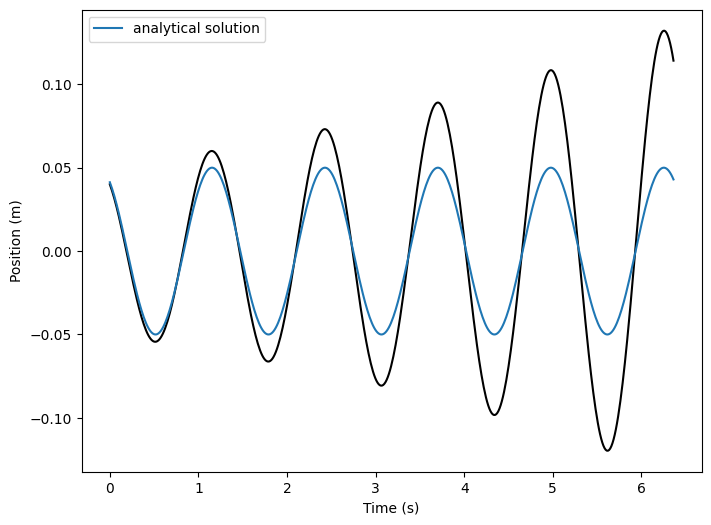

In [ ]:
# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 = 0.04
vx0 = -0.15

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.05
m = 0.1
k = 2.43

# Enter the period you determined from Part 1
T = 1.275
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = 5*T


# call initialize
t, pos, vel = initialize(x0,vx0,tmax,dt)


# call calculate
t, pos, vel = calculate(t,pos,vel,k,m,dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize=(8,6))
plt.plot(t,pos,color='black')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')


# overplot your analytic solution from Part 1
omega = omega = 2*np.pi/T
phi_1 = -0.6

an_position = calculate_2(A, omega, phi_1, t)
plt.plot(t,an_position,label='analytical solution')
plt.legend()

# Conservation of Energy

(5 points)


The total mechanical energy of a mass oscillating on a spring is:

$$ E = KE + PE  $$

For a one-dimensional oscillator that is moving only in the x direction, the total energy is:

$$ E = \frac{1}{2}m v_x^2 + \frac{1}{2} k x^2 $$

Make a plot of total energy vs time for your Euler solution.

**Questions**

Briefly answer the following questions in your wiki summary.
1. Does your Euler solution conserve energy?  
1. Is the Euler method a good approach for modeling oscillatory motion?

Text(0.5, 0, 'Time (s)')

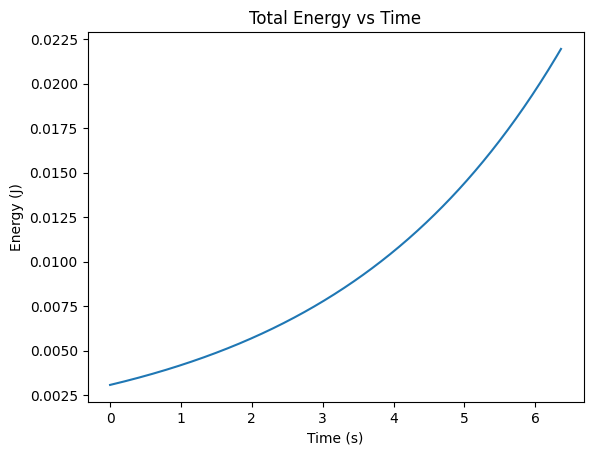

In [ ]:
# Your plot of energy vs time here
E = 0.5*m*vel**2 + 0.5*k*pos**2
plt.plot(t,E)
plt.title('Total Energy vs Time')
plt.ylabel('Energy (J)')
plt.xlabel('Time (s)')

# Euler-Cromer Solution

* Copy your calculate function below, but call it `euler_cromer_calculate`
* Adjust the code so that the $\omega_{i+1}$ is used to calculate $\theta_{i+1}$.
* Replot the position vs time.
* Replot total energy vs time.


**Questions**

Briefly answer the following questions in your wiki summary.
1. What is different about the Euler vs Euler-Cromer method?
1. Does the Euler-Cromer solution conserve energy?

In [ ]:
# your euler_cromer_calculate

def euler_cromer_calculate(t,pos,vel,k,m,dt):
  """
  description:

  parameters:

  return:
  """
  omega = np.sqrt(k/m)
  phi = 0.35

  for i in range(1,len(t)):
    vel[i] = vel[i-1] + acceleration(k,m,pos[i-1]*dt)
    pos[i] = pos[i-1] + vel[i]*dt
    t[i] = t[i-1] + dt

  return t, pos, vel

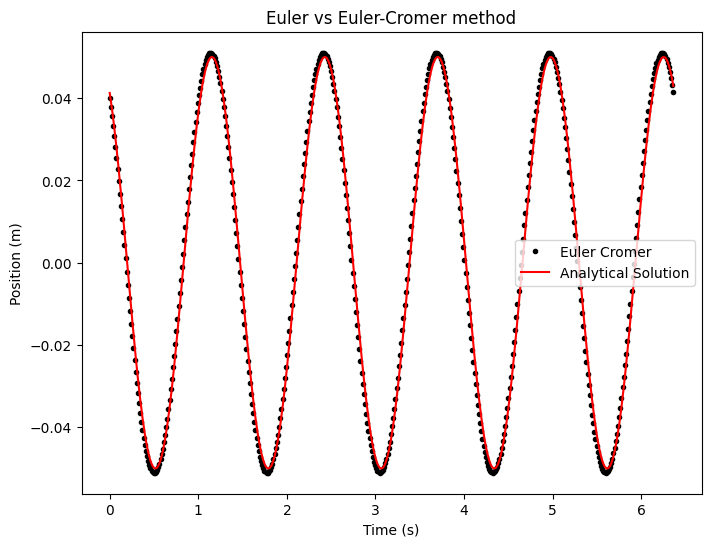

In [ ]:
# copy your main function cell from above
# call euler_cromer_calculate instead of calculate

t_e, pos_e, vel_e = euler_cromer_calculate(t,pos,vel,k,m,dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize=(8,6))
plt.plot(t_e,pos_e,'k.',label='Euler Cromer')
plt.plot(t,an_position,color='red',label='Analytical Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Euler vs Euler-Cromer method')
plt.legend()




(-1.0, 1.0)

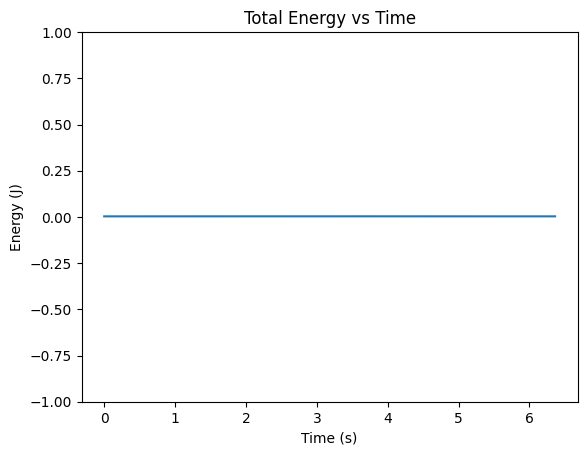

In [ ]:
# copy your total energy vs time plot from above
# but plot the output from the Euler-Cromer solution here

E = 0.5*m*vel**2 + 0.5*k*pos**2
plt.plot(t_e,E)
plt.title('Total Energy vs Time')
plt.ylabel('Energy (J)')
plt.xlabel('Time (s)')
plt.ylim(-1,1)